# Imports

In [1]:
import numpy as np

from genome import Genome
from player import Player
from population import Population
from train import play_game

# Setup

In [2]:
history = []

# Genome Testing

## Genomes

Initializing genome1
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 0, []




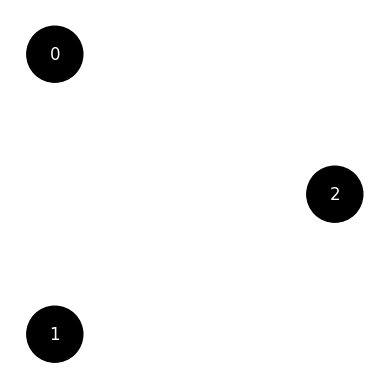

In [3]:
print("Initializing genome1")
genome1 = Genome(1, 1)
genome1.print_state()
genome1.draw_state()

General mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.8915,I=0,E=1)]
	History: [History(0->2,I=0,L=[])]

	Mutations
	Connections: [Gene(Node(0,L=0)->Node(2,L=1),W=-0.8915,I=0,E=1)]




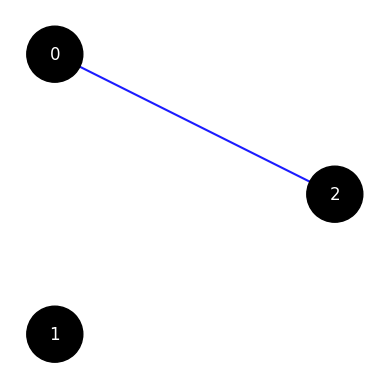

In [4]:
print("General mutation")
nodes, connections = genome1.mutate_genome(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Node mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.8915,I=0,E=1)]
	History: [History(0->2,I=0,L=[])]




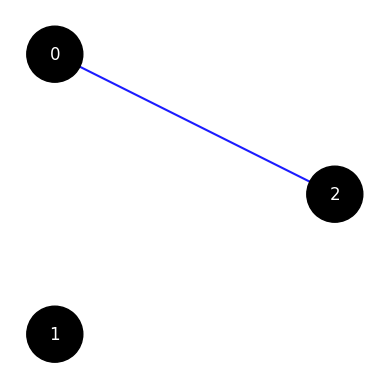

In [5]:
print("Node mutation")
nodes, connections = genome1.mutate_node(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Gene mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 2, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.8915,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=1),W=-0.5222,I=1,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0])]

	Mutations
	Connections: [Gene(Node(1,L=0)->Node(2,L=1),W=-0.5222,I=1,E=1)]




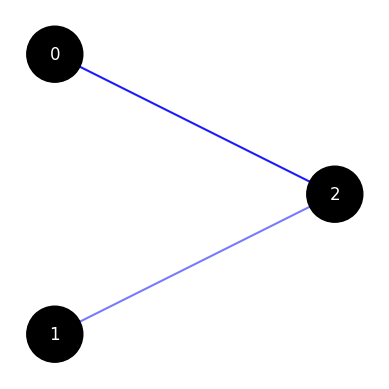

In [6]:
print("Gene mutation")
connection = genome1.mutate_connection(history)
genome1.print_state(history=history, connections=[connection])
genome1.draw_state()

Node mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.8915,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5222,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5222,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Nodes: [Node(3,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5222,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




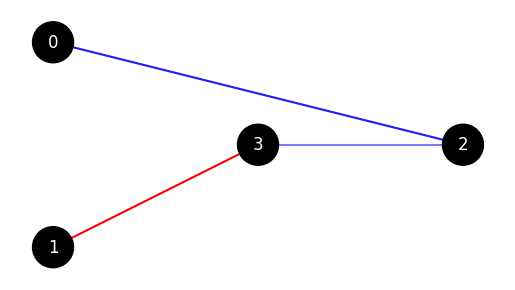

In [7]:
print("Node mutation")
nodes, connections = genome1.mutate_node(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Initializing genome2
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 0, []
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]




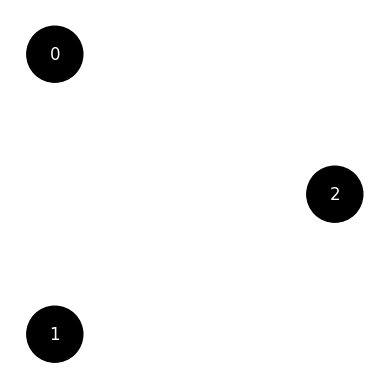

In [8]:
print("Initializing genome2")
genome2 = Genome(1, 1)
genome2.print_state(history=history)
genome2.draw_state()

General mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(1,L=0)->Node(2,L=1),W=0.9850,I=5,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->2,I=5,L=[])]

	Mutations
	Connections: [Gene(Node(1,L=0)->Node(2,L=1),W=0.9850,I=5,E=1)]




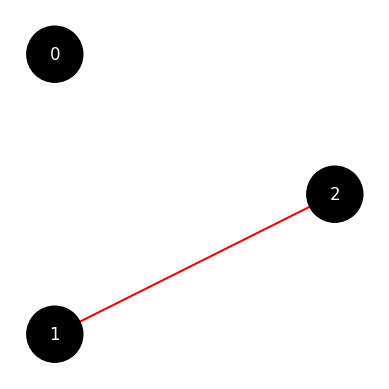

In [9]:
print("General mutation")
nodes, connections = genome2.mutate_genome(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Node mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 4, [Gene(Node(1,L=0)->Node(2,L=2),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=6,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.9850,I=7,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=8,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->2,I=5,L=[]), History(1->3,I=6,L=[5]), History(3->2,I=7,L=[5, 6]), History(0->3,I=8,L=[5, 6, 7])]

	Mutations
	Nodes: [Node(3,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=6,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.9850,I=7,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=8,E=1)]




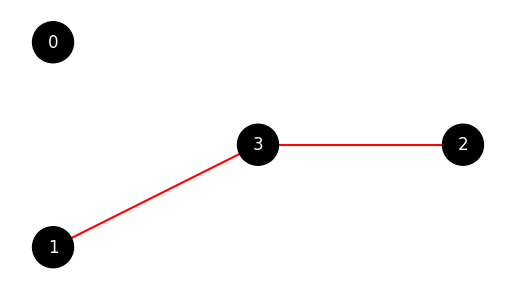

In [10]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(1,L=0)->Node(2,L=2),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=6,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.9850,I=7,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=2),W=0.4035,I=9,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->2,I=5,L=[]), History(1->3,I=6,L=[5]), History(3->2,I=7,L=[5, 6]), History(0->3,I=8,L=[5, 6, 7]), History(0->2,I=9,L=[5, 6, 7, 8])]

	Mutations
	Connections: [Gene(Node(0,L=0)->Node(2,L=2),W=0.4035,I=9,E=1)]




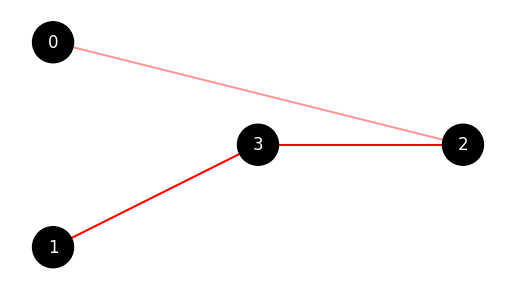

In [11]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 8, [Gene(Node(1,L=0)->Node(2,L=3),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=6,E=1), Gene(Node(3,L=1)->Node(2,L=3),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4035,I=9,E=1), Gene(Node(3,L=1)->Node(4,L=2),W=1.0000,I=10,E=1), Gene(Node(4,L=2)->Node(2,L=3),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=12,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->2,I=5,L=[]), History(1->3,I=6,L=[5]), History(3->2,I=7,L=[5, 6]), History(0->3,I=8,L=[5, 6, 7]), History(0->2,I=9,L=[5, 6, 7, 8]), History(3->4,I=10,L=[5, 6, 7, 8, 9]), History(4->2,I=11,L=[5, 6, 7, 8, 9, 10]), History(0->4,I=12,L=[5, 6, 7, 8, 9, 10, 11])]

	Mutations
	Nodes: [Node(4,L=2)]
	Connectio

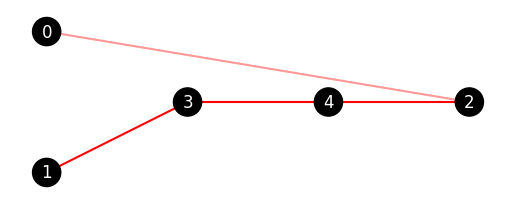

In [12]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 9, [Gene(Node(1,L=0)->Node(2,L=3),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=6,E=1), Gene(Node(3,L=1)->Node(2,L=3),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4035,I=9,E=1), Gene(Node(3,L=1)->Node(4,L=2),W=1.0000,I=10,E=1), Gene(Node(4,L=2)->Node(2,L=3),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=0.9409,I=13,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->2,I=5,L=[]), History(1->3,I=6,L=[5]), History(3->2,I=7,L=[5, 6]), History(0->3,I=8,L=[5, 6, 7]), History(0->2,I=9,L=[5, 6, 7, 8]), History(3->4,I=10,L=[5, 6, 7, 8, 9]), History(4->2,I=11,L=[5, 6, 7, 8, 9, 10]), History(0->4,I=12,L=[5, 6, 7, 8, 9, 10, 

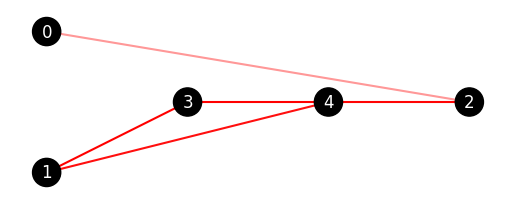

In [13]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1), Node(5,L=1)], 2: [Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(1,L=0)->Node(2,L=3),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=6,E=1), Gene(Node(3,L=1)->Node(2,L=3),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4035,I=9,E=1), Gene(Node(3,L=1)->Node(4,L=2),W=1.0000,I=10,E=1), Gene(Node(4,L=2)->Node(2,L=3),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=0.9409,I=13,E=0), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=14,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=0.9409,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=16,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->2,I=5,L=[]), History(1->3,I=6,L=[5]), History(3->2,I=7,L=[5, 6]), History(0->3,I=8,L=[5

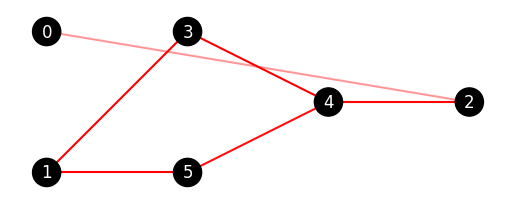

In [14]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1), Node(5,L=1)], 2: [Node(4,L=2)], 3: [Node(2,L=3)]}
	Connections: 13, [Gene(Node(1,L=0)->Node(2,L=3),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=6,E=1), Gene(Node(3,L=1)->Node(2,L=3),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4035,I=9,E=1), Gene(Node(3,L=1)->Node(4,L=2),W=1.0000,I=10,E=1), Gene(Node(4,L=2)->Node(2,L=3),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=0.9409,I=13,E=0), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=14,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=0.9409,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=16,E=1), Gene(Node(5,L=1)->Node(2,L=3),W=-0.2108,I=17,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->2,I=5,L=[]), History(1->3,I=6,L=[5])

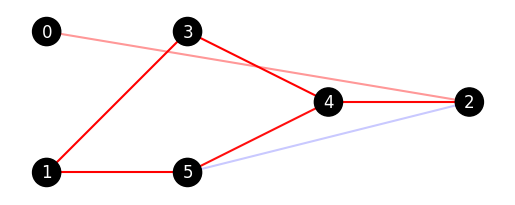

In [15]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 7 (5), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(6,L=1)], 2: [Node(3,L=2), Node(5,L=2)], 3: [Node(4,L=3)], 4: [Node(2,L=4)]}
	Connections: 16, [Gene(Node(1,L=0)->Node(2,L=4),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(3,L=2)->Node(2,L=4),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=4),W=0.4035,I=9,E=1), Gene(Node(3,L=2)->Node(4,L=3),W=1.0000,I=10,E=1), Gene(Node(4,L=3)->Node(2,L=4),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=3),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=3),W=0.9409,I=13,E=0), Gene(Node(1,L=0)->Node(5,L=2),W=1.0000,I=14,E=0), Gene(Node(5,L=2)->Node(4,L=3),W=0.9409,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=2),W=0.0000,I=16,E=1), Gene(Node(5,L=2)->Node(2,L=4),W=-0.2108,I=17,E=1), Gene(Node(1,L=0)->Node(6,L=1),W=1.0000,I=18,E=1), Gene(Node(6,L=1)->Node(5,L=2),W=1.0000,I=19,E=1), Gene(Node(0,L=0)->Node(6,L=1),W=0.0000,I=20,E=1)]
	History: [History(0->2,I=0,L=[]

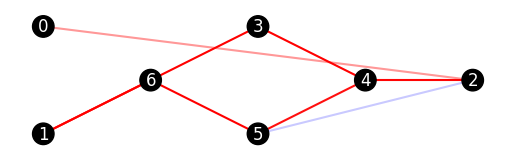

In [16]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

## Crossover

genome1
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.8915,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5222,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5222,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




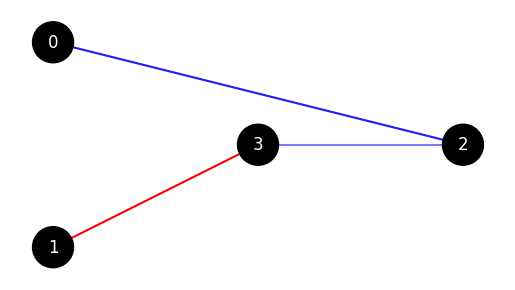

In [17]:
print("genome1")
genome1.print_state()
genome1.draw_state()

genome2
	State
	Nodes: 7 (5), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(6,L=1)], 2: [Node(3,L=2), Node(5,L=2)], 3: [Node(4,L=3)], 4: [Node(2,L=4)]}
	Connections: 16, [Gene(Node(1,L=0)->Node(2,L=4),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(3,L=2)->Node(2,L=4),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=4),W=0.4035,I=9,E=1), Gene(Node(3,L=2)->Node(4,L=3),W=1.0000,I=10,E=1), Gene(Node(4,L=3)->Node(2,L=4),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=3),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=3),W=0.9409,I=13,E=0), Gene(Node(1,L=0)->Node(5,L=2),W=1.0000,I=14,E=0), Gene(Node(5,L=2)->Node(4,L=3),W=0.9409,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=2),W=0.0000,I=16,E=1), Gene(Node(5,L=2)->Node(2,L=4),W=-0.2108,I=17,E=1), Gene(Node(1,L=0)->Node(6,L=1),W=1.0000,I=18,E=1), Gene(Node(6,L=1)->Node(5,L=2),W=1.0000,I=19,E=1), Gene(Node(0,L=0)->Node(6,L=1),W=0.0000,I=20,E=1)]




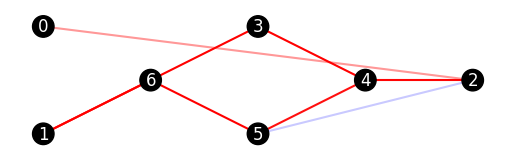

In [18]:
print("genome2")
genome2.print_state()
genome2.draw_state()

Crossover genome1 with genome 2 to create genome3
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.8915,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5222,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5222,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




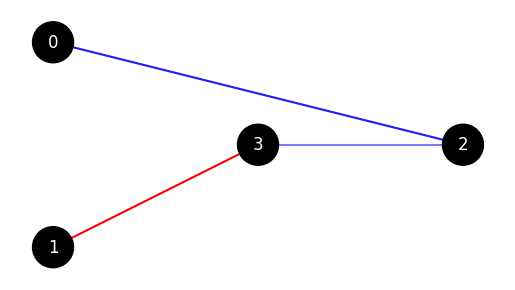

In [19]:
print("Crossover genome1 with genome 2 to create genome3")
genome3 = genome1.crossover(genome2)
genome3.print_state()
genome3.draw_state()

Crossover genome2 with genome 1 to create genome4
	State
	Nodes: 7 (5), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(6,L=1)], 2: [Node(3,L=2), Node(5,L=2)], 3: [Node(4,L=3)], 4: [Node(2,L=4)]}
	Connections: 16, [Gene(Node(1,L=0)->Node(2,L=4),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(3,L=2)->Node(2,L=4),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=4),W=0.4035,I=9,E=1), Gene(Node(3,L=2)->Node(4,L=3),W=1.0000,I=10,E=1), Gene(Node(4,L=3)->Node(2,L=4),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=3),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=3),W=0.9409,I=13,E=0), Gene(Node(1,L=0)->Node(5,L=2),W=1.0000,I=14,E=0), Gene(Node(5,L=2)->Node(4,L=3),W=0.9409,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=2),W=0.0000,I=16,E=1), Gene(Node(5,L=2)->Node(2,L=4),W=-0.2108,I=17,E=1), Gene(Node(1,L=0)->Node(6,L=1),W=1.0000,I=18,E=1), Gene(Node(6,L=1)->Node(5,L=2),W=1.0000,I=19,E=1), Gene(Node(0,L=0)->Node(6,L=1),W=0.0000,I=20,E=

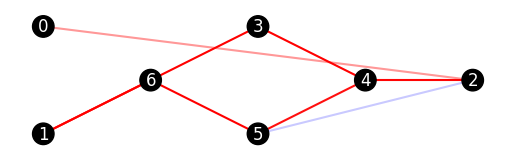

In [20]:
print("Crossover genome2 with genome 1 to create genome4")
genome4 = genome2.crossover(genome1)
genome4.print_state()
genome4.draw_state()

## Cloning

Clone genome1 to create genome5
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.8915,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5222,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5222,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




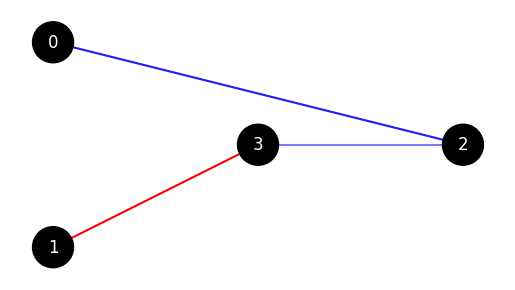

In [21]:
print("Clone genome1 to create genome5")
genome5 = genome1.clone()
genome5.print_state()
genome5.draw_state()

Clone genome2 to create genome6
	State
	Nodes: 7 (5), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(6,L=1)], 2: [Node(3,L=2), Node(5,L=2)], 3: [Node(4,L=3)], 4: [Node(2,L=4)]}
	Connections: 16, [Gene(Node(1,L=0)->Node(2,L=4),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(3,L=2)->Node(2,L=4),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=4),W=0.4035,I=9,E=1), Gene(Node(3,L=2)->Node(4,L=3),W=1.0000,I=10,E=1), Gene(Node(4,L=3)->Node(2,L=4),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=3),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=3),W=0.9409,I=13,E=0), Gene(Node(1,L=0)->Node(5,L=2),W=1.0000,I=14,E=0), Gene(Node(5,L=2)->Node(4,L=3),W=0.9409,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=2),W=0.0000,I=16,E=1), Gene(Node(5,L=2)->Node(2,L=4),W=-0.2108,I=17,E=1), Gene(Node(1,L=0)->Node(6,L=1),W=1.0000,I=18,E=1), Gene(Node(6,L=1)->Node(5,L=2),W=1.0000,I=19,E=1), Gene(Node(0,L=0)->Node(6,L=1),W=0.0000,I=20,E=1)]




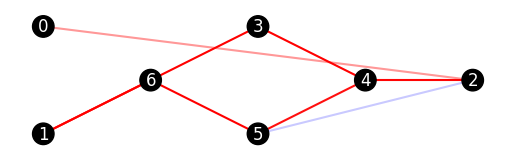

In [22]:
print("Clone genome2 to create genome6")
genome6 = genome2.clone()
genome6.print_state()
genome6.draw_state()

## Propagation

genome1
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.8915,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5222,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5222,I=3,E=1)]


[0.2400200298358385]


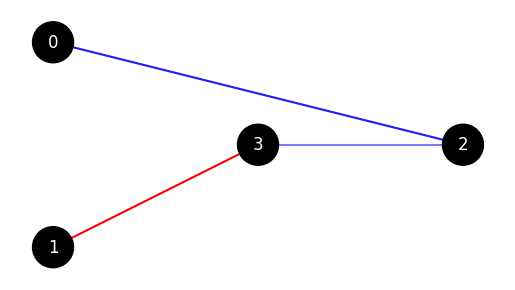

In [23]:
print("genome1")
out1 = genome1.forward_pass([1, 0.5])
genome1.print_state()
genome1.draw_state()
print(out1)

genome2
	State
	Nodes: 7 (5), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(6,L=1)], 2: [Node(3,L=2), Node(5,L=2)], 3: [Node(4,L=3)], 4: [Node(2,L=4)]}
	Connections: 16, [Gene(Node(1,L=0)->Node(2,L=4),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(3,L=2)->Node(2,L=4),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=4),W=0.4035,I=9,E=1), Gene(Node(3,L=2)->Node(4,L=3),W=1.0000,I=10,E=1), Gene(Node(4,L=3)->Node(2,L=4),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=3),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=3),W=0.9409,I=13,E=0), Gene(Node(1,L=0)->Node(5,L=2),W=1.0000,I=14,E=0), Gene(Node(5,L=2)->Node(4,L=3),W=0.9409,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=2),W=0.0000,I=16,E=1), Gene(Node(5,L=2)->Node(2,L=4),W=-0.2108,I=17,E=1), Gene(Node(1,L=0)->Node(6,L=1),W=1.0000,I=18,E=1), Gene(Node(6,L=1)->Node(5,L=2),W=1.0000,I=19,E=1), Gene(Node(0,L=0)->Node(6,L=1),W=0.0000,I=20,E=1)]


[0.777986901816342]


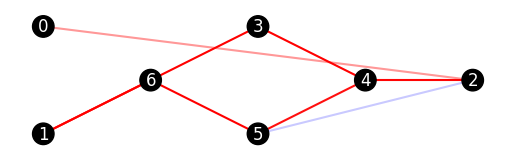

In [24]:
print("genome2")
genome2.print_state()
genome2.draw_state()
out2 = genome2.forward_pass([1, 0.5])
print(out2)

genome3
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.8915,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5222,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5222,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]


[0.2400200298358385]


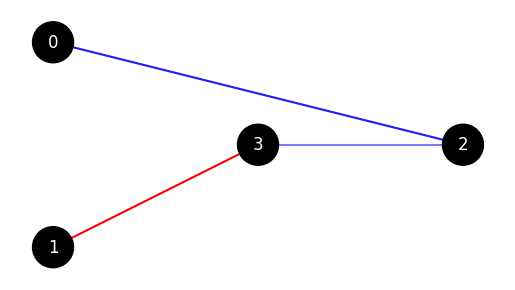

In [25]:
print("genome3")
genome3.print_state()
genome3.draw_state()
out3 = genome3.forward_pass([1, 0.5])
print(out3)

genome4
	State
	Nodes: 7 (5), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(6,L=1)], 2: [Node(3,L=2), Node(5,L=2)], 3: [Node(4,L=3)], 4: [Node(2,L=4)]}
	Connections: 16, [Gene(Node(1,L=0)->Node(2,L=4),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(3,L=2)->Node(2,L=4),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=4),W=0.4035,I=9,E=1), Gene(Node(3,L=2)->Node(4,L=3),W=1.0000,I=10,E=1), Gene(Node(4,L=3)->Node(2,L=4),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=3),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=3),W=0.9409,I=13,E=0), Gene(Node(1,L=0)->Node(5,L=2),W=1.0000,I=14,E=0), Gene(Node(5,L=2)->Node(4,L=3),W=0.9409,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=2),W=0.0000,I=16,E=1), Gene(Node(5,L=2)->Node(2,L=4),W=-0.2108,I=17,E=1), Gene(Node(1,L=0)->Node(6,L=1),W=1.0000,I=18,E=1), Gene(Node(6,L=1)->Node(5,L=2),W=1.0000,I=19,E=1), Gene(Node(0,L=0)->Node(6,L=1),W=0.0000,I=20,E=1)]


[0.777986901816342]


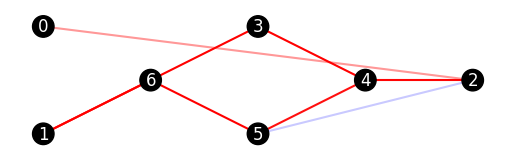

In [26]:
print("genome4")
genome4.print_state()
genome4.draw_state()
out4 = genome4.forward_pass([1, 0.5])
print(out4)

genome5
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.8915,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.5222,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.5222,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]


[0.2400200298358385]


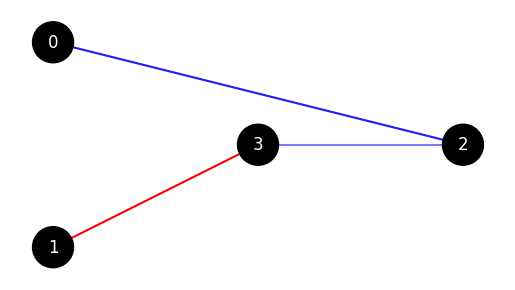

In [27]:
print("genome5")
genome5.print_state()
genome5.draw_state()
out5 = genome5.forward_pass([1, 0.5])
print(out5)

genome6
	State
	Nodes: 7 (5), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(6,L=1)], 2: [Node(3,L=2), Node(5,L=2)], 3: [Node(4,L=3)], 4: [Node(2,L=4)]}
	Connections: 16, [Gene(Node(1,L=0)->Node(2,L=4),W=0.9850,I=5,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(3,L=2)->Node(2,L=4),W=0.9850,I=7,E=0), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=8,E=1), Gene(Node(0,L=0)->Node(2,L=4),W=0.4035,I=9,E=1), Gene(Node(3,L=2)->Node(4,L=3),W=1.0000,I=10,E=1), Gene(Node(4,L=3)->Node(2,L=4),W=0.9850,I=11,E=1), Gene(Node(0,L=0)->Node(4,L=3),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=3),W=0.9409,I=13,E=0), Gene(Node(1,L=0)->Node(5,L=2),W=1.0000,I=14,E=0), Gene(Node(5,L=2)->Node(4,L=3),W=0.9409,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=2),W=0.0000,I=16,E=1), Gene(Node(5,L=2)->Node(2,L=4),W=-0.2108,I=17,E=1), Gene(Node(1,L=0)->Node(6,L=1),W=1.0000,I=18,E=1), Gene(Node(6,L=1)->Node(5,L=2),W=1.0000,I=19,E=1), Gene(Node(0,L=0)->Node(6,L=1),W=0.0000,I=20,E=1)]


[0.777986901816342]


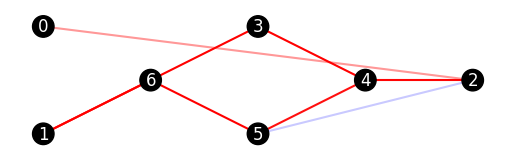

In [28]:
print("genome6")
genome6.print_state()
genome6.draw_state()
out6 = genome6.forward_pass([1, 0.5])
print(out6)

# Player Testing

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 0, []




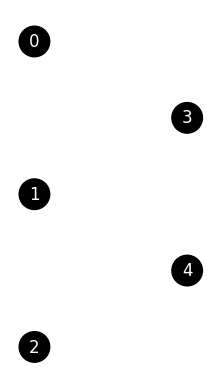

In [29]:
history = []

player = Player(2, 2)
player.nn.print_state()
player.nn.draw_state()

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(1,L=0)->Node(4,L=1),W=-0.2740,I=0,E=1)]




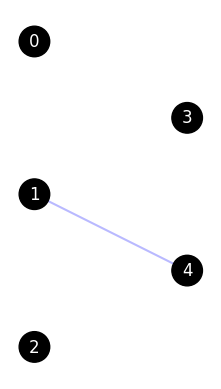

In [30]:
player.mutate(history)
player.nn.print_state()
player.nn.draw_state()

In [31]:
inputs = [1] + np.random.randint(2, size=2).tolist()
decision = player.decide(inputs)
print(inputs, player.nn.forward_pass(inputs), decision)

[1, 0, 0] [0.5, 0.5] 0


# Population Testing

In [32]:
population = Population(1000, 2, 2)
players = population.new_generation()
won = play_game(players)
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()
print("Innovation History: %s" % population.innovation_history)
print("Number of Species: %d" % len(population.species))
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness))

Innovation History: [History(0->3,I=0,L=[]), History(2->4,I=1,L=[]), History(1->4,I=2,L=[]), History(0->4,I=3,L=[]), History(1->3,I=4,L=[]), History(2->3,I=5,L=[]), History(2->5,I=6,L=[1]), History(5->4,I=7,L=[1, 6]), History(0->5,I=8,L=[1, 6, 7]), History(1->5,I=9,L=[2]), History(5->4,I=10,L=[2, 9]), History(0->5,I=11,L=[2, 9, 10]), History(1->5,I=12,L=[4]), History(5->3,I=13,L=[4, 12]), History(0->5,I=14,L=[4, 12, 13]), History(2->5,I=15,L=[5]), History(5->3,I=16,L=[5, 15]), History(0->5,I=17,L=[5, 15, 16])]
Number of Species: 10
Species 0 - Players: 78, Average Fitness: 53.5769
Species 1 - Players: 82, Average Fitness: 53.7073
Species 2 - Players: 84, Average Fitness: 53.6429
Species 3 - Players: 88, Average Fitness: 54.2841
Species 4 - Players: 82, Average Fitness: 53.8171
Species 5 - Players: 87, Average Fitness: 53.7356
Species 6 - Players: 2, Average Fitness: 57.5000
Species 7 - Players: 2, Average Fitness: 52.5000
Species 8 - Players: 2, Average Fitness: 46.0000
Species 9 - Pla

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=0.6122,I=1,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=-0.4183,I=1,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=-0.2749,I=1,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=0.3384,I=1,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=0.7413,I=1,E=1)]




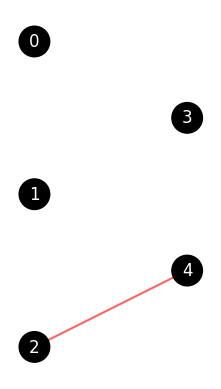

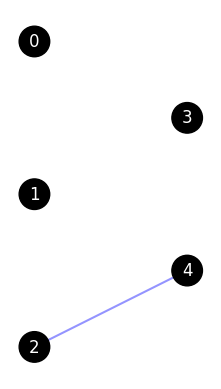

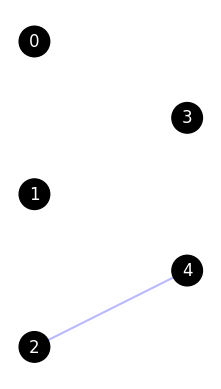

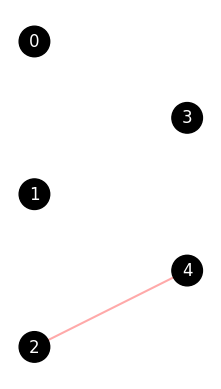

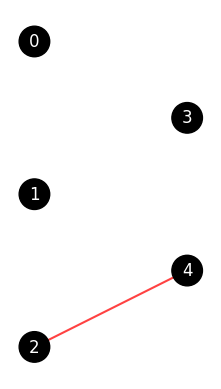

In [33]:
species = population.species[0]
for i in range(min(5, len(species.players))):
    player = species.players[i]
    player.nn.print_state()
    player.nn.draw_state()

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=0.6122,I=1,E=1)]


[1, 0, 0] [0.5, 0.5] 0 1
[1, 1, 0] [0.5, 0.5] 0 1
[1, 0, 0] [0.5, 0.5] 0 2
[1, 0, 0] [0.5, 0.5] 0 3
[1, 1, 1] [0.5, 0.6484497103283651] 1 3
[1, 1, 1] [0.5, 0.6484497103283651] 1 3
[1, 1, 0] [0.5, 0.5] 0 3
[1, 1, 0] [0.5, 0.5] 0 3
[1, 0, 0] [0.5, 0.5] 0 4
[1, 1, 1] [0.5, 0.6484497103283651] 1 4


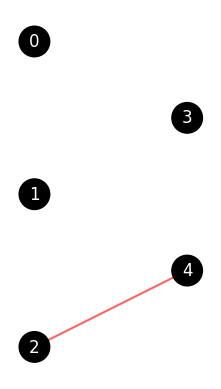

In [34]:
player = species.players[0]
player.nn.print_state()
player.nn.draw_state()

won = 0
for _ in range(10):
    inputs = [1] + np.random.randint(2, size=2).tolist()
    decision = player.decide(inputs)
    if inputs[1] == inputs[2] and decision == 0:
        won += 1
    elif inputs[1] != inputs[2] and decision == 1:
        won += 1
    print(inputs, player.nn.forward_pass(inputs), decision, won)

	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 4, [Gene(Node(2,L=0)->Node(3,L=2),W=-0.5402,I=5,E=0), Gene(Node(2,L=0)->Node(5,L=1),W=1.0000,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=17,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=-0.5402,I=16,E=1)]




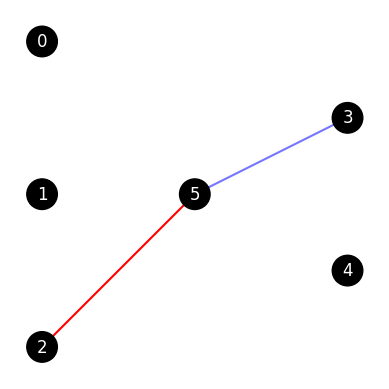

In [35]:
species = population.species[np.argmin([len(s.players) for s in population.species])]
for i in range(min(5, len(species.players))):
    player = species.players[i]
    player.nn.print_state()
    player.nn.draw_state()

	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 4, [Gene(Node(2,L=0)->Node(3,L=2),W=-0.5402,I=5,E=0), Gene(Node(2,L=0)->Node(5,L=1),W=1.0000,I=15,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=17,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=-0.5402,I=16,E=1)]


[1, 1, 1] [0.3681503424570273, 0.5] 1 0
[1, 0, 1] [0.3681503424570273, 0.5] 1 1
[1, 0, 0] [0.5, 0.5] 0 2
[1, 1, 1] [0.3681503424570273, 0.5] 1 2
[1, 1, 1] [0.3681503424570273, 0.5] 1 2
[1, 0, 1] [0.3681503424570273, 0.5] 1 3
[1, 1, 0] [0.5, 0.5] 0 3
[1, 0, 0] [0.5, 0.5] 0 4
[1, 0, 0] [0.5, 0.5] 0 5
[1, 1, 0] [0.5, 0.5] 0 5


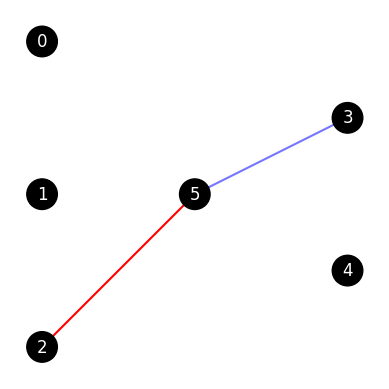

In [36]:
player = species.players[0]
player.nn.print_state()
player.nn.draw_state()

won = 0
for _ in range(10):
    inputs = [1] + np.random.randint(2, size=2).tolist()
    decision = player.decide(inputs)
    if inputs[1] == inputs[2] and decision == 0:
        won += 1
    elif inputs[1] != inputs[2] and decision == 1:
        won += 1
    print(inputs, player.nn.forward_pass(inputs), decision, won)

# Iteration Test

In [37]:
population = Population(1000, 2, 2)
players = population.new_generation()
won = play_game(players)
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()

print("Innovations: %s" % len(population.innovation_history))
print("Species: %d" % len(population.species))
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness, population.species[i].max_fitness))

Innovations: 18
Species: 10
Species 0 - Players: 89, Average Fitness: 54.3933, Max Fitness: 68.0000
Species 1 - Players: 81, Average Fitness: 54.5432, Max Fitness: 65.0000
Species 2 - Players: 76, Average Fitness: 53.9342, Max Fitness: 64.0000
Species 3 - Players: 89, Average Fitness: 53.8989, Max Fitness: 64.0000
Species 4 - Players: 77, Average Fitness: 53.8052, Max Fitness: 61.0000
Species 5 - Players: 88, Average Fitness: 53.5227, Max Fitness: 60.0000
Species 6 - Players: 2, Average Fitness: 54.5000, Max Fitness: 58.0000
Species 7 - Players: 1, Average Fitness: 56.0000, Max Fitness: 56.0000
Species 8 - Players: 2, Average Fitness: 48.0000, Max Fitness: 53.0000
Species 9 - Players: 2, Average Fitness: 48.0000, Max Fitness: 52.0000


In [38]:
players = population.new_generation()
won = play_game(players)
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()

print("Innovations: %s" % len(population.innovation_history))
print("Species: %d" % len(population.species))
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness, population.species[i].max_fitness))

Innovations: 52
Species: 10
Species 0 - Players: 51, Average Fitness: 55.1176, Max Fitness: 78.0000
Species 1 - Players: 52, Average Fitness: 53.1731, Max Fitness: 74.0000
Species 2 - Players: 46, Average Fitness: 54.7174, Max Fitness: 73.0000
Species 3 - Players: 51, Average Fitness: 55.0000, Max Fitness: 71.0000
Species 4 - Players: 52, Average Fitness: 53.8269, Max Fitness: 70.0000
Species 5 - Players: 51, Average Fitness: 53.9608, Max Fitness: 64.0000
Species 6 - Players: 46, Average Fitness: 54.5435, Max Fitness: 64.0000
Species 7 - Players: 51, Average Fitness: 53.9216, Max Fitness: 63.0000
Species 8 - Players: 53, Average Fitness: 53.4340, Max Fitness: 62.0000
Species 9 - Players: 55, Average Fitness: 53.2909, Max Fitness: 61.0000


# Training Test

In [39]:
num_iters = 100
print_step = 5
population_size = 1000
num_inputs = 2
num_outputs = 2
max_hits_threshold = 5

max_hits = 0

population = Population(population_size, num_inputs, num_outputs)

for iteration in range(num_iters):
    players = population.new_generation()
    won = play_game(players)
    for i in range(len(players)):
        players[i].fitness = won[i]
    population.update_generation()
    if iteration % print_step == 0:
        print("Iteration: %d, Innovations: %s, Species: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (iteration, len(population.innovation_history), len(population.species), population.sum_average_fitness / len(population.species), population.max_fitness))
    elif population.max_fitness == 100:
        print("Iteration: %d, Innovations: %s, Species: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (iteration, len(population.innovation_history), len(population.species), population.sum_average_fitness / len(population.species), population.max_fitness))
        max_hits += 1
    else:
        max_hits = 0
    if max_hits == max_hits_threshold:
        max_player = population.species[0].players[0]
        break

Iteration: 0, Innovations: 15, Species: 9, Average Fitness: 52.5827, Max Fitness: 66.0000
Iteration: 5, Innovations: 126, Species: 18, Average Fitness: 64.5774, Max Fitness: 86.0000
Iteration: 10, Innovations: 201, Species: 26, Average Fitness: 70.5221, Max Fitness: 90.0000
Iteration: 15, Innovations: 285, Species: 34, Average Fitness: 73.7020, Max Fitness: 88.0000
Iteration: 20, Innovations: 364, Species: 39, Average Fitness: 72.9723, Max Fitness: 87.0000
Iteration: 24, Innovations: 414, Species: 45, Average Fitness: 75.0981, Max Fitness: 100.0000
Iteration: 25, Innovations: 427, Species: 48, Average Fitness: 73.9813, Max Fitness: 100.0000
Iteration: 26, Innovations: 438, Species: 49, Average Fitness: 73.6720, Max Fitness: 100.0000
Iteration: 27, Innovations: 455, Species: 52, Average Fitness: 73.2727, Max Fitness: 100.0000
Iteration: 28, Innovations: 463, Species: 51, Average Fitness: 73.9474, Max Fitness: 100.0000
Iteration: 29, Innovations: 470, Species: 54, Average Fitness: 74.721

[1, 0, 0] [0.5918880387806611, 0.5772491376470447] 0
[1, 0, 1] [0.5914726080190821, 0.6348668045780392] 1
[1, 1, 0] [0.587421524507379, 0.6265880711287929] 1
[1, 1, 1] [0.6338225668561569, 0.630986946400547] 0
	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 10, [Gene(Node(1,L=0)->Node(3,L=2),W=-0.0916,I=1,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=-0.9720,I=12,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.2631,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=2),W=0.2288,I=41,E=1), Gene(Node(2,L=0)->Node(5,L=1),W=0.7689,I=87,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.4449,I=119,E=1), Gene(Node(1,L=0)->Node(4,L=2),W=0.2888,I=210,E=1), Gene(Node(2,L=0)->Node(3,L=2),W=0.2120,I=396,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=-0.2780,I=13,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=0.3143,I=181,E=1)]




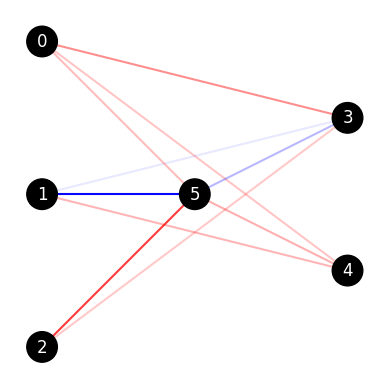

In [40]:
for i in range(4):
    inputs = [1, 0 if i < 2 else 1, 0 if i % 2 == 0 else 1]
    decision = max_player.decide(inputs)
    print(inputs, max_player.nn.forward_pass(inputs), decision)
max_player.nn.print_state()
max_player.nn.draw_state()

[1, 0, 0] [0.5, 0.5] 0
[1, 0, 1] [0.35989515198666705, 0.5] 1
[1, 1, 0] [0.4526932296015555, 0.5] 1
[1, 1, 1] [0.3174286460478809, 0.5] 1
	State
	Nodes: 7 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1), Node(6,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 9, [Gene(Node(2,L=0)->Node(3,L=2),W=-0.5758,I=3,E=1), Gene(Node(2,L=0)->Node(5,L=1),W=-0.3210,I=6,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=-0.2055,I=8,E=1), Gene(Node(1,L=0)->Node(3,L=2),W=-0.1898,I=37,E=1), Gene(Node(1,L=0)->Node(6,L=1),W=0.0349,I=63,E=1), Gene(Node(0,L=0)->Node(6,L=1),W=-0.9842,I=65,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=0.1090,I=7,E=1), Gene(Node(6,L=1)->Node(3,L=2),W=-0.4705,I=64,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=-0.7291,I=152,E=1)]




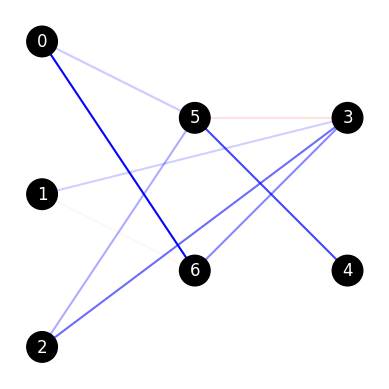

In [41]:
player = population.species[np.random.randint(len(population.species))].players[0]
while player.nn.num_nodes < 7:
    player = population.species[np.random.randint(len(population.species))].players[0]
for i in range(4):
    inputs = [1, 0 if i < 2 else 1, 0 if i % 2 == 0 else 1]
    decision = player.decide(inputs)
    print(inputs, player.nn.forward_pass(inputs), decision)
player.nn.print_state()
player.nn.draw_state()